### 조건수 : Cond. No.
- 데이터의 스케일에 따라서 오차의 크기가 다르게 나옵니다.
- 보스턴 집값을 회귀분석하면 조건수가 15,000 정도로 크게 나옵니다.
- 각각의 독립변수 데이터의 단위가 0.1 단위 ~ 수백 단위까지 가지고 있어서 조건수가 크게 나옵니다.
- 조건수가 크면 모수 추정의 오차가 증폭될 가능성이 크고 선형 회귀분석의 성능이 떨어집니다.

In [1]:
%config InlineBackend.figure_formats = {'png', 'retina'}

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import statsmodels.api as sm

from sklearn.datasets import load_boston

boston = load_boston()

df_x = pd.DataFrame(boston.data, columns=boston.feature_names)
df_y = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([df_x, df_y], axis=1)

C:\Users\min\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

In [3]:
df.tail(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [4]:
train_featrue = sm.add_constant(df_x)
model_1 = sm.OLS(df_y, train_featrue).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          6.72e-135
Time:                        20:20:22   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

### TAX feature의 스케일을 크게 설정
- 조건수의 값이 커지고 모수의 설명력을 표현하는 R-squared 값이 작아졌습니다.

In [5]:
df_x2 = df_x.copy()
df_x2["TAX"] *= 1e12
df2 = pd.concat([df_x2, df_y], axis=1)
df2.tail(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,2.730000e+14,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,2.730000e+14,21.0,396.90,7.88,11.9


In [6]:
train_featrue = sm.add_constant(df_x2)
model_2 = sm.OLS(df_y, train_featrue).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     151.4
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          5.12e-128
Time:                        20:20:22   Log-Likelihood:                -1527.8
No. Observations:                 506   AIC:                             3074.
Df Residuals:                     497   BIC:                             3112.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4342      0.020     22.268      0.0

### scale을 지정해서 모델을 생성
- StandardScaler를 이용해서 학습하면 R-squared를 유지하면서 Cond. No.를 줄일수 있습니다.
- StandardScaler
    - 평균이 0과 표준편차가 1이 되도록 변환

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
df_x3 = df_x.copy()
df_x3.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
# 스케일링
df_x3 = scaler.fit_transform(df_x3)
df_x3 = pd.DataFrame(df_x3, columns=df_x.columns)
df_x3.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [11]:
# 인버스 스케일링
inverse_datas = scaler.inverse_transform(df_x3)
pd.DataFrame(inverse_datas, columns=df_x.columns).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
# 모델 학습
train_featrue = sm.add_constant(df_x3)
model_3 = sm.OLS(df_y, train_featrue).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          6.72e-135
Time:                        20:20:22   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.211    106.814      0.0

In [13]:
# 예측할때는 데이터에 상수항을 추가하고 스케일링을 해서 예측해야 함

# target 컬럼 제거
features = df.loc[:, df.columns[:-1]]

# 스케일링
features = scaler.fit_transform(features)

# 데이터 프레임으로 만들기
features = pd.DataFrame(features, columns=df.columns[:-1])

# 상수항 추가
features = sm.add_constant(features)

features.head()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,1.0,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,1.0,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,1.0,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,1.0,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [14]:
# 예측
pred_y = np.dot(features, model_3.params)
np.round(pred_y[:5], 1), df_y.values[:5].reshape(1, -1)

(array([30. , 25. , 30.6, 28.6, 27.9]),
 array([[24. , 21.6, 34.7, 33.4, 36.2]]))

In [15]:
# 평가 : MAE

In [16]:
from sklearn.metrics import mean_absolute_error

In [17]:
np.round(mean_absolute_error(df_y.values, pred_y), 3)

3.271

#### 스케일링의 종류
- StandardScaler : 평균이 0과 표준편차가 1이 되도록 변환.
- MinMaxScaler : 최대값이 각각 1, 최소값이 0이 되도록 변환록 변환.
- RobustScaler : 중앙값(median) 0이 되도록 변환
- Nomalizer : 0을 기준으로 절대값이 가장 큰 수가 1또는 -1이 되도록 변환

In [18]:
!pip install mglearn

  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582645 sha256=5e02d8220345fe7feed2f55b9a28c1d6a6f659b4a8748613c10e9454d24bc1c5
  Stored in directory: c:\users\min\appdata\local\pip\cache\wheels\87\75\37\404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn


C:\Users\min\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


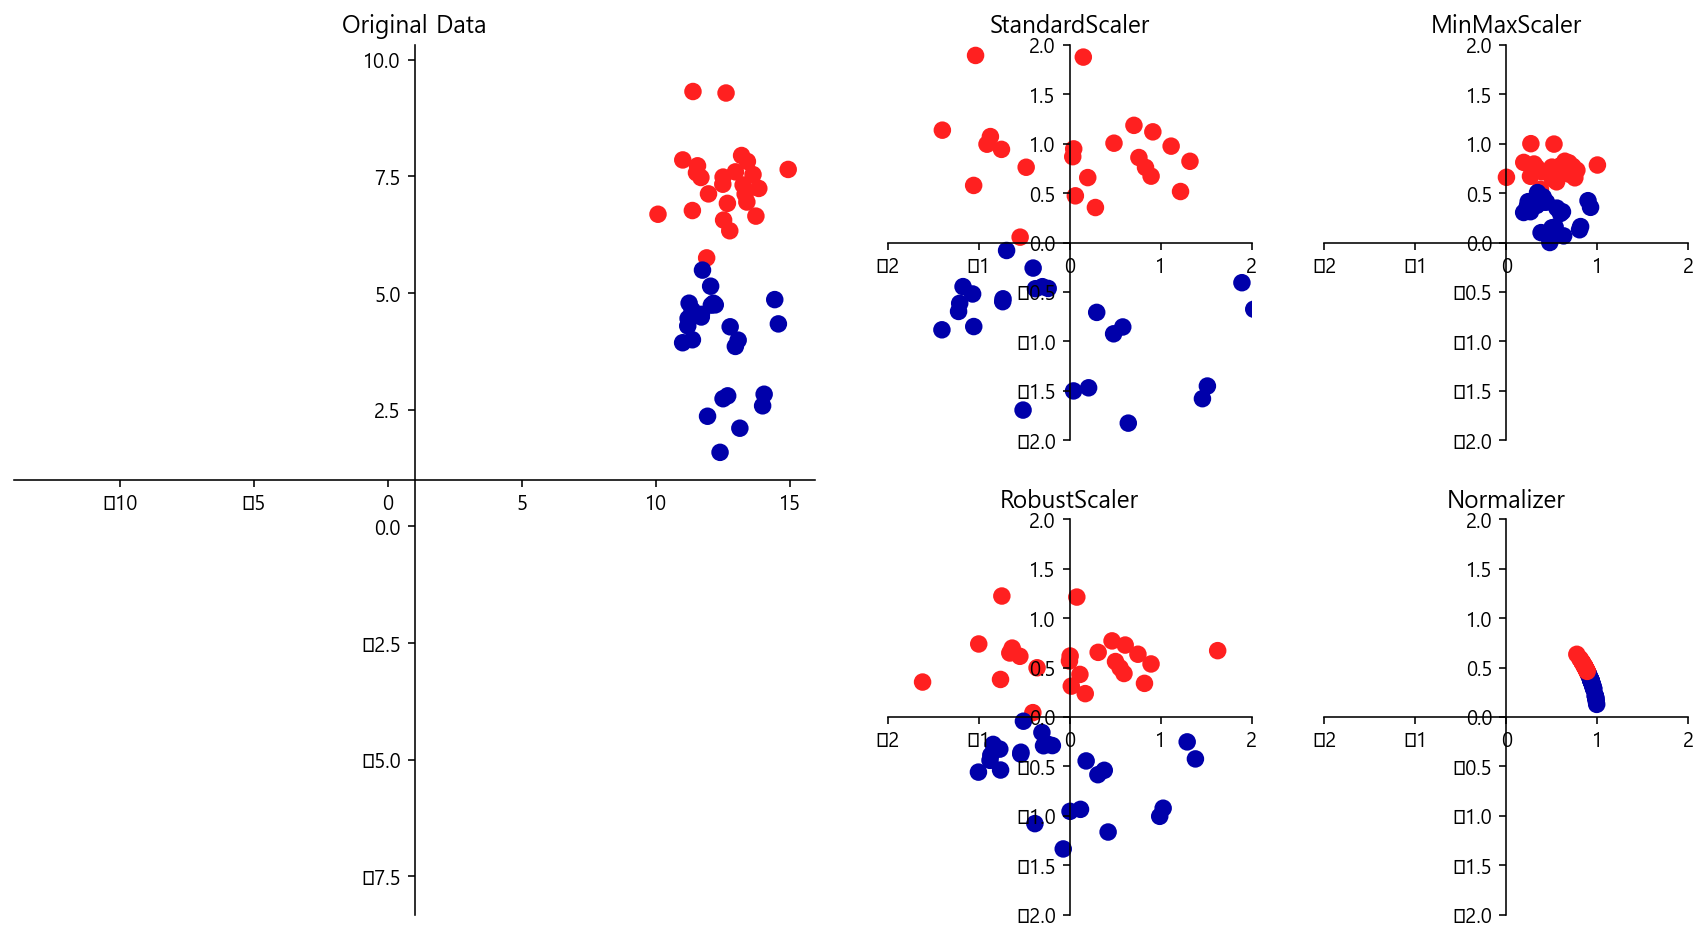

In [19]:
import mglearn
mglearn.plots.plot_scaling()